# Quantum Computer lab 4

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* These lab exercises are on quantum errors and noise

* Please run the code to make sure it works, then try the questions.
* The idea is to explore the Shor algorithm written classical or implemented on the IBM qiskit simulator.

There is documentation about qiskit at https://qiskit.org/ and https://learning.quantum-computing.ibm.com/

## Installing qiskit

There is information on installing qiskit at:  https://qiskit.org/documentation/getting_started.html
I really recommend using a virtual enviroment to install qiskit

* You can run on IBM's simulator using  https://quantum-computing.ibm.com/


##  Installing qiskit on the University machines
These instructions are modified from the material developed by Vincent Drach. Unfortunately, you will have to do this everytime you start a new session.

* Start the anconda prompt
* conda create --name qiskit
* conda activate qiskit
* conda install numpy matplotlib spyder-kernels
* pip install qiskit
* pip install qiskit-aer
* pip install qiskit[visualization]

In Spyder Open Tools -> Preferences
select "Use the following python interpreter" and select the path of your installation

C:/Users/vdrach/.conda/envs/qiskit/python.exe

To check the enviroment, restart the kernel in the console




## What to do

The python code below runs circuits with and without noise.

*  First run all the code.
*  You can then adjust the amount of noise and study the change in measurements.
*  At the end of the notebook is some material on repetition codes. This is not required for the coursework.


##  Noise model

* https://qiskit.org/ecosystem/aer/tutorials/3_building_noise_models.html   (This was the old documentation for the quantum noise qiskit
  modules.)
* https://qiskit.org/ecosystem/aer/apidocs/aer_noise.html
* https://docs.quantum.ibm.com/api/qiskit/0.34/aer_noise   the recent documentation from IBM

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

In [6]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u3', 'u2']
  All-qubits errors: ['u1', 'u2', 'u3']


In [7]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)

# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


## No quantum error

The cell below runs the simulator with no quantum noises

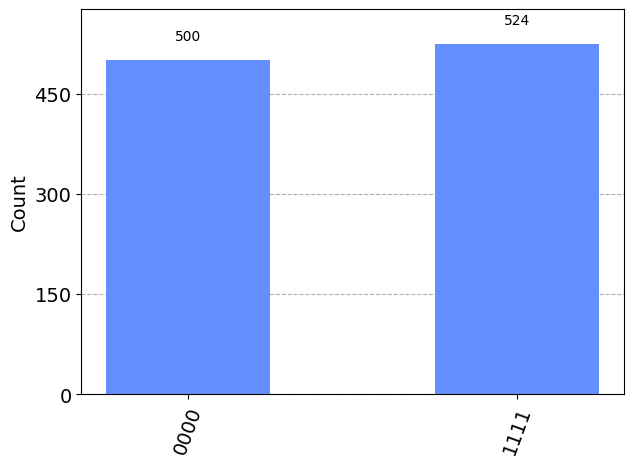

In [8]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))


## Building a noise model

In [18]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
noise_bit_flip.add_all_qubit_quantum_error
# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u1', 'u3', 'reset', 'measure']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3']


## Run the noise model

In [19]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)



The results show the effect of the noise on the measurements

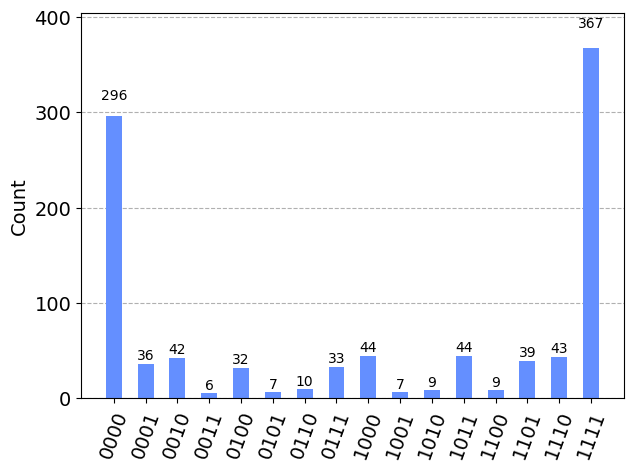

In [20]:
# Plot noisy output
plot_histogram(counts_bit_flip)

**QUESTION**

* what happens when you reduce or increase p_reset, p_meas or p_gate?
* what happens if you comment out some of the code around Add errors to noise model


In [23]:
# you can read the documentation for some of the functions using
help(noise_bit_flip.add_all_qubit_quantum_error)

Help on method add_all_qubit_quantum_error in module qiskit_aer.noise.noise_model:

add_all_qubit_quantum_error(error, instructions, warnings=True) method of qiskit_aer.noise.noise_model.NoiseModel instance
    Add a quantum error to the noise model that applies to all qubits.
    
    Args:
        error (QuantumError): the quantum error object.
        instructions (str or list[str] or
                      Instruction or
                      list[Instruction]): the instructions error applies to.
        warnings (bool): Display warning if appending to an instruction that
                         already has an error (Default: True).
    
    Raises:
        NoiseError: if the input parameters are invalid.
    
    Additional Information:
        If the error object is ideal it will not be added to the model.



## A second noise model

In [7]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

# Print noise model info
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']


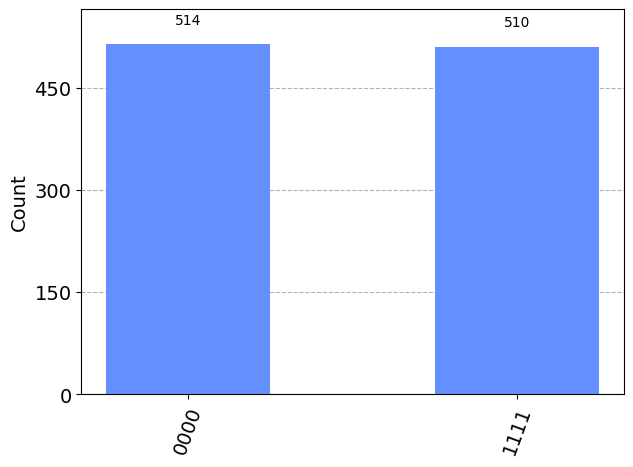

In [8]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

In [21]:
help(pauli_error)

Help on function pauli_error in module qiskit_aer.noise.errors.standard_errors:

pauli_error(noise_ops)
    Return a mixed Pauli quantum error channel.
    
    The input should be a list of pairs ``(P[j], p[j])``, where
    ``P[j]`` is a ``Pauli`` object or string label, and ``p[j]`` is a
    probability. All probabilities must sum to 1 for the input ops to
    be valid.
    
    Args:
        noise_ops (list[pair[Pauli, double]]): Pauli error terms.
    
    Returns:
        QuantumError: The quantum error object.
    
    Raises:
        NoiseError: If depolarizing probability is less than 0 or greater than 1.



## Noise model from a "real system"

This example came from https://qiskit.org/ecosystem/aer/apidocs/aer_noise.html

See more information
https://docs.quantum.ibm.com/api/qiskit/qiskit.providers.fake_provider.FakeVigo

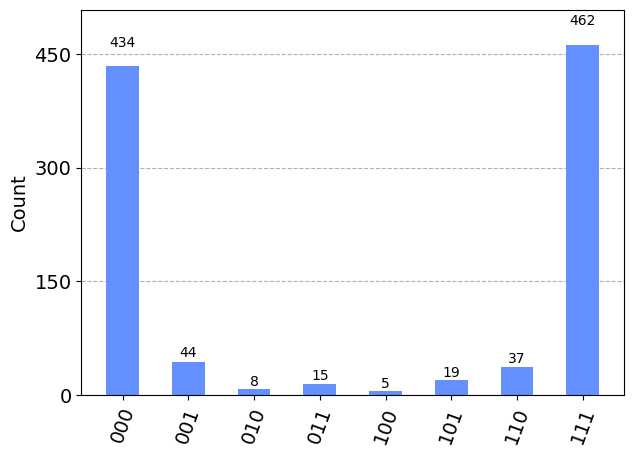

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(circ, backend)
result = backend.run(transpiled_circuit).result()

counts = result.get_counts(0)
plot_histogram(counts)

In [25]:
coupling_map 

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [27]:
backend

AerSimulator('aer_simulator'
             noise_model=<NoiseModel on ['id', 'sx', 'x', 'cx', 'measure']>)

In [26]:
help( NoiseModel.from_backend)

Help on method from_backend in module qiskit_aer.noise.noise_model:

from_backend(backend, gate_error=True, readout_error=True, thermal_relaxation=True, temperature=0, gate_lengths=None, gate_length_units='ns', warnings=None) method of builtins.type instance
    Return a noise model derived from a devices backend properties.
    
    This function generates a noise model based on:
    
    * 1 and 2 qubit gate errors consisting of a
      :func:`depolarizing_error` followed
      by a :func:`thermal_relaxation_error`.
    
    * Single qubit :class:`ReadoutError` on all measurements.
    
    The error (noise) parameters are tuned for each individual qubit based on
    the :math:`T_1`, :math:`T_2`, frequency and readout error parameters for
    each qubit, and the gate error and gate time parameters for each gate
    obtained from the device backend properties.
    
    Note that if un-physical parameters are supplied, they are internally truncated to
    the theoretical bound values. 

## Question

Look at the list of quantum computers. https://en.wikipedia.org/wiki/List_of_quantum_processorsVi
* How many qubits has Vigo? What is the experimental realization of the qubits?

Can you what other IBM machines are available as noise models from the qiskit documentation? 

##  Additional reading

There are additional examples at:
https://github.com/qiskit-community/qiskit-presentations/blob/master/2019-02-26_QiskitCamp/QiskitCamp_Simulation.ipynb

##  Repetition Codes

This is material from https://qiskit.org/documentation/stable/0.28/tutorials/noise/6_repetition_code.html

This python code is **NOT** required for the coursework.

It is best to start by reading the above web page, because it has text and explanations.

The example python codes up physical qubits into logical qubits. It the does calculations on the logical qubits and checks that they are
resilant against noise.


In [1]:
from qiskit import *
cq = QuantumRegister(2,'code_qubit')
lq = QuantumRegister(1,'link_qubit')
qc = QuantumCircuit(cq,lq)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
print(qc)

                        
code_qubit_0: ──■───────
                │       
code_qubit_1: ──┼────■──
              ┌─┴─┐┌─┴─┐
  link_qubit: ┤ X ├┤ X ├
              └───┘└───┘


In [2]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding


/tmp/ipykernel_113819/3621201268.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.topological_codes import RepetitionCode


In [3]:
d = 3
T = 2
code = RepetitionCode(d,T)

In [4]:
code.qubit_registers

{'code_qubit', 'link_qubit'}

In [5]:
code.code_qubit



QuantumRegister(3, 'code_qubit')

In [6]:
for log in ['0','1']:
    print('\n========= logical',log,'=========\n')
    print( code.circuit[log] )


========= logical 0 =========

                    ┌───┐     ┌───┐     ┌─┐   ┌───┐     ┌───┐        ┌─┐      »
      link_qubit_0: ┤ X ├─────┤ X ├─────┤M├───┤ X ├─────┤ X ├────────┤M├──────»
                    └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐└─┬─┘┌───┐└─┬─┘┌───┐   └╥┘┌─┐   »
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├─╫─┤M├──┼──┤ X ├──┼──┤ X ├────╫─┤M├───»
                      │  └─┬─┘  │  └─┬─┘ ║ └╥┘  │  └─┬─┘  │  └─┬─┘┌─┐ ║ └╥┘   »
      code_qubit_0: ──■────┼────┼────┼───╫──╫───■────┼────┼────┼──┤M├─╫──╫────»
                           │    │    │   ║  ║        │    │    │  └╥┘ ║  ║ ┌─┐»
      code_qubit_1: ───────■────■────┼───╫──╫────────■────■────┼───╫──╫──╫─┤M├»
                                     │   ║  ║                  │   ║  ║  ║ └╥┘»
      code_qubit_2: ─────────────────■───╫──╫──────────────────■───╫──╫──╫──╫─»
                                         ║  ║                      ║  ║  ║  ║ »
round_0_link_bit: 2/═════════════════════╩══╩══════════════════════╬══╬══╬══╬═»
        

In [7]:
empty_code = RepetitionCode(3,0)


In [8]:
def print_circuits(code):
    for log in ['0','1']:
        print('\n========= logical',log,'=========\n')
        print( code.circuit[log] )

print_circuits(empty_code)


========= logical 0 =========

              
link_qubit_0: 
              
link_qubit_1: 
              
code_qubit_0: 
              
code_qubit_1: 
              
code_qubit_2: 
              

========= logical 1 =========

                   
link_qubit_0: ─────
                   
link_qubit_1: ─────
              ┌───┐
code_qubit_0: ┤ X ├
              ├───┤
code_qubit_1: ┤ X ├
              ├───┤
code_qubit_2: ┤ X ├
              └───┘


In [9]:
empty_code.syndrome_measurement()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐     ┌─┐   
      link_qubit_0: ┤ X ├─────┤ X ├─────┤M├───
                    └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├─╫─┤M├
                      │  └─┬─┘  │  └─┬─┘ ║ └╥┘
      code_qubit_0: ──■────┼────┼────┼───╫──╫─
                           │    │    │   ║  ║ 
      code_qubit_1: ───────■────■────┼───╫──╫─
                                     │   ║  ║ 
      code_qubit_2: ─────────────────■───╫──╫─
                                         ║  ║ 
round_0_link_bit: 2/═════════════════════╩══╩═
                                         0  1 

========= logical 1 =========

                         ┌───┐     ┌───┐     ┌─┐   
      link_qubit_0: ─────┤ X ├─────┤ X ├─────┤M├───
                         └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐
      link_qubit_1: ───────┼──┤ X ├──┼──┤ X ├─╫─┤M├
                    ┌───┐  │  └─┬─┘  │  └─┬─┘ ║ └╥┘
      code_qubit_0: ┤ X ├──■────┼────┼────┼───╫──╫─
             

In [10]:
empty_code.x()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐   
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├───
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘┌─┐
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫─┤M├
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║ └╥┘
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫──╫─
                           │    │    │  ├───┤ ║  ║ 
      code_qubit_1: ───────■────■────┼──┤ X ├─╫──╫─
                                     │  ├───┤ ║  ║ 
      code_qubit_2: ─────────────────■──┤ X ├─╫──╫─
                                        └───┘ ║  ║ 
round_0_link_bit: 2/══════════════════════════╩══╩═
                                              0  1 

========= logical 1 =========

                         ┌───┐     ┌───┐          ┌─┐   
      link_qubit_0: ─────┤ X ├─────┤ X ├──────────┤M├───
                         └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘┌─┐
      link_qubit_1: ───────┼──┤ X ├──┼──┤ X ├──────╫─┤M├
                    ┌───┐  │  └─

In [11]:
empty_code.readout()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐            
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├────────────
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘┌─┐         
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫─┤M├─────────
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║ └╥┘┌─┐      
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫──╫─┤M├──────
                           │    │    │  ├───┤ ║  ║ └╥┘┌─┐   
      code_qubit_1: ───────■────■────┼──┤ X ├─╫──╫──╫─┤M├───
                                     │  ├───┤ ║  ║  ║ └╥┘┌─┐
      code_qubit_2: ─────────────────■──┤ X ├─╫──╫──╫──╫─┤M├
                                        └───┘ ║  ║  ║  ║ └╥┘
round_0_link_bit: 2/══════════════════════════╩══╩══╬══╬══╬═
                                              0  1  ║  ║  ║ 
        code_bit: 3/════════════════════════════════╩══╩══╩═
                                                    0  1  2 

========= logical 1 =========

                     

## Running a repetition code¶

The code object produces the circuits required for the code. The user can then run them using any method they prefer, allowing full control over compilation, backends, noise models and so on.

For example, here we run them without noise on the qasm_simulator.

In [12]:
circuits = code.get_circuit_list()
job = execute( circuits, Aer.get_backend('qasm_simulator') )
raw_results = {}
for log in ['0','1']:
    raw_results[log] = job.result().get_counts(log)
    print('\n========= logical',log,'=========\n')
    print(raw_results[log])


========= logical 0 =========

{'000 00 00': 1024}

========= logical 1 =========

{'111 00 00': 1024}


In [13]:
code.process_results( raw_results )



{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}

In [14]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])

    return noise_model

In [15]:
noise_model = get_noise(0.04,0.04)



In [16]:
def get_syndrome(code,noise_model,shots=1014):

    circuits = code.get_circuit_list()

    job = execute( circuits, Aer.get_backend('qasm_simulator'),noise_model=noise_model, shots=shots )
    raw_results = {}
    for log in ['0','1']:
        raw_results[log] = job.result().get_counts(log)

    return code.process_results( raw_results )

In [17]:
get_syndrome(code,noise_model)

{'0': {'1 0  10 00 11': 1,
  '0 1  00 01 11': 2,
  '0 0  00 10 01': 5,
  '0 0  01 11 01': 2,
  '1 0  00 11 01': 1,
  '0 0  01 10 11': 2,
  '1 0  00 10 11': 3,
  '0 1  00 11 10': 1,
  '0 1  00 11 01': 3,
  '1 0  10 10 10': 3,
  '1 0  00 01 11': 3,
  '0 1  10 10 01': 2,
  '0 0  00 01 10': 19,
  '0 0  10 11 01': 8,
  '0 0  10 01 11': 1,
  '0 0  01 00 01': 7,
  '0 1  01 01 01': 3,
  '0 0  01 01 00': 55,
  '0 1  01 00 00': 1,
  '0 1  00 01 00': 17,
  '0 0  10 10 00': 55,
  '0 1  00 10 11': 5,
  '0 0  00 11 11': 2,
  '0 0  00 10 10': 42,
  '1 0  00 01 00': 2,
  '0 0  00 01 01': 48,
  '1 0  00 00 10': 44,
  '0 0  00 00 00': 523,
  '1 0  00 10 00': 17,
  '0 0  10 00 01': 1,
  '0 1  10 11 00': 2,
  '0 0  10 01 00': 1,
  '0 1  00 00 01': 34,
  '1 0  10 11 00': 1,
  '1 1  00 00 11': 2,
  '0 0  00 00 11': 25,
  '1 1  11 01 10': 1,
  '1 0  00 11 10': 2,
  '0 0  10 10 11': 5,
  '0 0  00 11 00': 19,
  '0 0  11 11 00': 4,
  '0 0  01 10 00': 11,
  '0 0  01 11 10': 4,
  '1 0  01 01 10': 2,
  '1 0  00 00

## Decoding a repetition code¶

Noisy results can change the logical value at readout, and so affect our ability to read out the logical qubit. This can be mitigated by looking at the syndrome values. These can tell us whether or not the logical values are most likely to have changed, and so allow us to correct for the errors. The process of analyzing the syndrome to correct for the errors is called ‘decoding’. We do this by building a decoding object for our code.

In [18]:
dec = GraphDecoder( RepetitionCode(4,2) )

This analyzes the code by seeing how different kinds of error change the output. With this information, along with a decoding algorithm, we can determine what the logical value is most likely to have been.

For example, let’s use the ‘matching’ algorithm to decode, which is based on minimum weight perfect matching. This takes specific output strings as input. We’ll give it the simple example string '1 0  001 100 100', for a logical 1 that has suffered two errors.

In [19]:
dec.matching('1 0  001 100 100')

'1 1'

The output is what the logical part should have been. As you can see, the decoder correctly determined that the readout should have been of a logical 1.

When we take many samples, we can determine the probability with which the decoder is incorrect. This should decrease exponentially as the code size is increased, since the configurations of noise that fool the decoder become less likely. The probability of a logical error is calculated using the logical_prob() method. This runs matching by default, but other algorithms can be specified by the algorithm kwarg.



In [20]:
for d in range(3,8):

    code = RepetitionCode(d,2)

    results = get_syndrome(code,noise_model=noise_model,shots=8192)

    dec = GraphDecoder(code)

    logical_prob_match = dec.get_logical_prob(results)
    logical_prob_lookup = lookuptable_decoding(results,results)
    logical_prob_post = postselection_decoding(results)

    for log in ['0','1']:
        print('d =',d,',log =',log)
        print('logical error probability for matching      =',logical_prob_match[log])
        print('logical error probability for lookup table  =',logical_prob_lookup[log])
        print('logical error probability for postselection =',logical_prob_post[log])
        print('')
    print('')


d = 3 ,log = 0
logical error probability for matching      = 0.0264892578125
logical error probability for lookup table  = 0.0211181640625
logical error probability for postselection = 0.0

d = 3 ,log = 1
logical error probability for matching      = 0.033203125
logical error probability for lookup table  = 0.0179443359375
logical error probability for postselection = 0.0


d = 4 ,log = 0
logical error probability for matching      = 0.0191650390625
logical error probability for lookup table  = 0.01025390625
logical error probability for postselection = 0.0

d = 4 ,log = 1
logical error probability for matching      = 0.0252685546875
logical error probability for lookup table  = 0.012939453125
logical error probability for postselection = 0.0


d = 5 ,log = 0
logical error probability for matching      = 0.0091552734375
logical error probability for lookup table  = 0.001953125
logical error probability for postselection = 0.0

d = 5 ,log = 1
logical error probability for matching      